In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

% matplotlib inline

In [2]:
#Importando data frame da fatores de transcrição
df = pd.read_csv(
    'df.csv',
    sep=',')
df = df.drop(['A', 'C', 'G', 'T'], axis=1)
print(type(df), df.shape)
df

<class 'pandas.core.frame.DataFrame'> (489, 5)


,ID,Name,Matrix,Motifs,ReverseComplement
0,>MA0020.1,Dof2,[[1. 1. 1. 0. ...,"['A', 'A', 'A', 'G', 'C', 'A']","['T', 'G', 'C', 'T', 'T', 'T']"
1,>MA0021.1,Dof3,[[1. 1. 1. 0. ...,"['A', 'A', 'A', 'G', 'Y', 'G']","['C', 'R', 'C', 'T', 'T', 'T']"
2,>MA0034.1,Gam1,[[0.16 0.4 0.12 0.92 1. 0.04 0.12 0.24 0.4 ...,"['G', 'A', 'Y', 'A', 'A', 'C', 'C', 'G', 'M', ...","['G', 'K', 'C', 'G', 'G', 'T', 'T', 'R', 'T', ..."
3,>MA0044.1,HMG-1,[[0. 0. 0. 0. ...,"['S', 'T', 'Y', 'G', 'T', 'A', 'Y', 'T', 'Y']","['R', 'A', 'R', 'T', 'A', 'C', 'R', 'A', 'S']"
4,>MA0045.1,HMG-I/Y,[[0.21428571 0.5 0.64285714 0.21428571 ...,"['C', 'A', 'A', 'C', 'A', 'A', 'A', 'T', 'G', ...","['R', 'T', 'K', 'T', 'T', 'K', 'C', 'C', 'A', ..."
5,>MA0053.1,MNB1A,[[1. 1. 1. 0. 0.2]\n [0. 0. 0. 0. 0.6]...,"['A', 'A', 'A', 'G', 'C']","['G', 'C', 'T', 'T', 'T']"
6,>MA0054.1,myb.Ph3,[[0.27142857 0.91428571 0.9 0.05714286 ...,"['T', 'A', 'A', 'C', 'C', 'G', 'T', 'T', 'W']","['W', 'A', 'A', 'C', 'G', 'G', 'T', 'T', 'A']"
7,>MA0064.1,PBF,[[1. 1. 1. 0. 0.0625]\n [0. ...,"['A', 'A', 'A', 'G', 'Y']","['R', 'C', 'T', 'T', 'T']"
8,>MA0082.1,squamosa,[[0.36666667 0. 0.8 0.53333333 ...,"['M', 'C', 'A', 'W', 'A', 'W', 'A', 'T', 'R', ...","['A', 'T', 'T', 'W', 'C', 'Y', 'A', 'T', 'W', ..."
9,>MA0096.1,bZIP910,[[0.42857143 0. 0. 1. ...,"['M', 'T', 'G', 'A', 'C', 'G', 'T']","['A', 'C', 'G', 'T', 'C', 'A', 'K']"


In [3]:
#Importando data frame da fatores de transcrição
genoma = pd.read_csv(
    'Genome Log.csv',
    sep=',')
genoma

,Promoter,ID,Name,Motifs,ReverseComplement,5l3l,3l5l
0,NaN,>MA0020.1,Dof2,"['A', 'A', 'A', 'G', 'C', 'A']","['T', 'G', 'C', 'T', 'T', 'T']",0,0
1,NaN,>MA0021.1,Dof3,"['A', 'A', 'A', 'G', 'Y', 'G']","['C', 'R', 'C', 'T', 'T', 'T']",0,0
2,NaN,>MA0034.1,Gam1,"['G', 'A', 'Y', 'A', 'A', 'C', 'C', 'G', 'M', ...","['G', 'K', 'C', 'G', 'G', 'T', 'T', 'R', 'T', ...",0,0
3,NaN,>MA0044.1,HMG-1,"['S', 'T', 'Y', 'G', 'T', 'A', 'Y', 'T', 'Y']","['R', 'A', 'R', 'T', 'A', 'C', 'R', 'A', 'S']",0,0
4,NaN,>MA0045.1,HMG-I/Y,"['C', 'A', 'A', 'C', 'A', 'A', 'A', 'T', 'G', ...","['R', 'T', 'K', 'T', 'T', 'K', 'C', 'C', 'A', ...",0,0
5,NaN,>MA0053.1,MNB1A,"['A', 'A', 'A', 'G', 'C']","['G', 'C', 'T', 'T', 'T']",0,0
6,NaN,>MA0054.1,myb.Ph3,"['T', 'A', 'A', 'C', 'C', 'G', 'T', 'T', 'W']","['W', 'A', 'A', 'C', 'G', 'G', 'T', 'T', 'A']",0,0
7,NaN,>MA0064.1,PBF,"['A', 'A', 'A', 'G', 'Y']","['R', 'C', 'T', 'T', 'T']",0,0
8,NaN,>MA0082.1,squamosa,"['M', 'C', 'A', 'W', 'A', 'W', 'A', 'T', 'R', ...","['A', 'T', 'T', 'W', 'C', 'Y', 'A', 'T', 'W', ...",0,0
9,NaN,>MA0096.1,bZIP910,"['M', 'T', 'G', 'A', 'C', 'G', 'T']","['A', 'C', 'G', 'T', 'C', 'A', 'K']",0,0


In [4]:
df['Genome'] = 0
i = genoma.groupby(['ID']).count()
df['Genome'] = i['5l3l'].values.copy()
df

,ID,Name,Matrix,Motifs,ReverseComplement,Genome
0,>MA0020.1,Dof2,[[1. 1. 1. 0. ...,"['A', 'A', 'A', 'G', 'C', 'A']","['T', 'G', 'C', 'T', 'T', 'T']",5
1,>MA0021.1,Dof3,[[1. 1. 1. 0. ...,"['A', 'A', 'A', 'G', 'Y', 'G']","['C', 'R', 'C', 'T', 'T', 'T']",1
2,>MA0034.1,Gam1,[[0.16 0.4 0.12 0.92 1. 0.04 0.12 0.24 0.4 ...,"['G', 'A', 'Y', 'A', 'A', 'C', 'C', 'G', 'M', ...","['G', 'K', 'C', 'G', 'G', 'T', 'T', 'R', 'T', ...",91
3,>MA0044.1,HMG-1,[[0. 0. 0. 0. ...,"['S', 'T', 'Y', 'G', 'T', 'A', 'Y', 'T', 'Y']","['R', 'A', 'R', 'T', 'A', 'C', 'R', 'A', 'S']",21726
4,>MA0045.1,HMG-I/Y,[[0.21428571 0.5 0.64285714 0.21428571 ...,"['C', 'A', 'A', 'C', 'A', 'A', 'A', 'T', 'G', ...","['R', 'T', 'K', 'T', 'T', 'K', 'C', 'C', 'A', ...",25575
5,>MA0053.1,MNB1A,[[1. 1. 1. 0. 0.2]\n [0. 0. 0. 0. 0.6]...,"['A', 'A', 'A', 'G', 'C']","['G', 'C', 'T', 'T', 'T']",79
6,>MA0054.1,myb.Ph3,[[0.27142857 0.91428571 0.9 0.05714286 ...,"['T', 'A', 'A', 'C', 'C', 'G', 'T', 'T', 'W']","['W', 'A', 'A', 'C', 'G', 'G', 'T', 'T', 'A']",7181
7,>MA0064.1,PBF,[[1. 1. 1. 0. 0.0625]\n [0. ...,"['A', 'A', 'A', 'G', 'Y']","['R', 'C', 'T', 'T', 'T']",2
8,>MA0082.1,squamosa,[[0.36666667 0. 0.8 0.53333333 ...,"['M', 'C', 'A', 'W', 'A', 'W', 'A', 'T', 'R', ...","['A', 'T', 'T', 'W', 'C', 'Y', 'A', 'T', 'W', ...",27431
9,>MA0096.1,bZIP910,[[0.42857143 0. 0. 1. ...,"['M', 'T', 'G', 'A', 'C', 'G', 'T']","['A', 'C', 'G', 'T', 'C', 'A', 'K']",957


In [5]:
#Importando data frame da analise de fenilpropanoides
fenilpropanoides = pd.read_csv(
    'Log.csv',
    sep=',')
fenilpropanoides

,Gene,ID,Name,Motifs,ReverseComplement,5l3l,3l5l,Mean,SUM
0,NaN,>MA0020.1,Dof2,"['A', 'A', 'A', 'G', 'C', 'A']","['T', 'G', 'C', 'T', 'T', 'T']",0,0,0.000000,0
1,NaN,>MA0021.1,Dof3,"['A', 'A', 'A', 'G', 'Y', 'G']","['C', 'R', 'C', 'T', 'T', 'T']",0,0,0.000000,0
2,NaN,>MA0034.1,Gam1,"['G', 'A', 'Y', 'A', 'A', 'C', 'C', 'G', 'M', ...","['G', 'K', 'C', 'G', 'G', 'T', 'T', 'R', 'T', ...",0,0,0.000000,0
3,NaN,>MA0044.1,HMG-1,"['S', 'T', 'Y', 'G', 'T', 'A', 'Y', 'T', 'Y']","['R', 'A', 'R', 'T', 'A', 'C', 'R', 'A', 'S']",0,0,0.000000,0
4,NaN,>MA0045.1,HMG-I/Y,"['C', 'A', 'A', 'C', 'A', 'A', 'A', 'T', 'G', ...","['R', 'T', 'K', 'T', 'T', 'K', 'C', 'C', 'A', ...",0,0,0.000000,0
5,NaN,>MA0053.1,MNB1A,"['A', 'A', 'A', 'G', 'C']","['G', 'C', 'T', 'T', 'T']",0,0,0.000000,0
6,NaN,>MA0054.1,myb.Ph3,"['T', 'A', 'A', 'C', 'C', 'G', 'T', 'T', 'W']","['W', 'A', 'A', 'C', 'G', 'G', 'T', 'T', 'A']",0,0,0.000000,0
7,NaN,>MA0064.1,PBF,"['A', 'A', 'A', 'G', 'Y']","['R', 'C', 'T', 'T', 'T']",0,0,0.000000,0
8,NaN,>MA0082.1,squamosa,"['M', 'C', 'A', 'W', 'A', 'W', 'A', 'T', 'R', ...","['A', 'T', 'T', 'W', 'C', 'Y', 'A', 'T', 'W', ...",0,0,0.000000,0
9,NaN,>MA0096.1,bZIP910,"['M', 'T', 'G', 'A', 'C', 'G', 'T']","['A', 'C', 'G', 'T', 'C', 'A', 'K']",0,0,0.000000,0


In [6]:
df['Cluster'] = 0
i = fenilpropanoides.groupby(['ID']).count()
df['Cluster'] = i['5l3l'].values.copy()
df

,ID,Name,Matrix,Motifs,ReverseComplement,Genome,Cluster
0,>MA0020.1,Dof2,[[1. 1. 1. 0. ...,"['A', 'A', 'A', 'G', 'C', 'A']","['T', 'G', 'C', 'T', 'T', 'T']",5,1
1,>MA0021.1,Dof3,[[1. 1. 1. 0. ...,"['A', 'A', 'A', 'G', 'Y', 'G']","['C', 'R', 'C', 'T', 'T', 'T']",1,1
2,>MA0034.1,Gam1,[[0.16 0.4 0.12 0.92 1. 0.04 0.12 0.24 0.4 ...,"['G', 'A', 'Y', 'A', 'A', 'C', 'C', 'G', 'M', ...","['G', 'K', 'C', 'G', 'G', 'T', 'T', 'R', 'T', ...",91,1
3,>MA0044.1,HMG-1,[[0. 0. 0. 0. ...,"['S', 'T', 'Y', 'G', 'T', 'A', 'Y', 'T', 'Y']","['R', 'A', 'R', 'T', 'A', 'C', 'R', 'A', 'S']",21726,31
4,>MA0045.1,HMG-I/Y,[[0.21428571 0.5 0.64285714 0.21428571 ...,"['C', 'A', 'A', 'C', 'A', 'A', 'A', 'T', 'G', ...","['R', 'T', 'K', 'T', 'T', 'K', 'C', 'C', 'A', ...",25575,36
5,>MA0053.1,MNB1A,[[1. 1. 1. 0. 0.2]\n [0. 0. 0. 0. 0.6]...,"['A', 'A', 'A', 'G', 'C']","['G', 'C', 'T', 'T', 'T']",79,1
6,>MA0054.1,myb.Ph3,[[0.27142857 0.91428571 0.9 0.05714286 ...,"['T', 'A', 'A', 'C', 'C', 'G', 'T', 'T', 'W']","['W', 'A', 'A', 'C', 'G', 'G', 'T', 'T', 'A']",7181,12
7,>MA0064.1,PBF,[[1. 1. 1. 0. 0.0625]\n [0. ...,"['A', 'A', 'A', 'G', 'Y']","['R', 'C', 'T', 'T', 'T']",2,1
8,>MA0082.1,squamosa,[[0.36666667 0. 0.8 0.53333333 ...,"['M', 'C', 'A', 'W', 'A', 'W', 'A', 'T', 'R', ...","['A', 'T', 'T', 'W', 'C', 'Y', 'A', 'T', 'W', ...",27431,35
9,>MA0096.1,bZIP910,[[0.42857143 0. 0. 1. ...,"['M', 'T', 'G', 'A', 'C', 'G', 'T']","['A', 'C', 'G', 'T', 'C', 'A', 'K']",957,5


In [7]:
df

,ID,Name,Matrix,Motifs,ReverseComplement,Genome,Cluster
0,>MA0020.1,Dof2,[[1. 1. 1. 0. ...,"['A', 'A', 'A', 'G', 'C', 'A']","['T', 'G', 'C', 'T', 'T', 'T']",5,1
1,>MA0021.1,Dof3,[[1. 1. 1. 0. ...,"['A', 'A', 'A', 'G', 'Y', 'G']","['C', 'R', 'C', 'T', 'T', 'T']",1,1
2,>MA0034.1,Gam1,[[0.16 0.4 0.12 0.92 1. 0.04 0.12 0.24 0.4 ...,"['G', 'A', 'Y', 'A', 'A', 'C', 'C', 'G', 'M', ...","['G', 'K', 'C', 'G', 'G', 'T', 'T', 'R', 'T', ...",91,1
3,>MA0044.1,HMG-1,[[0. 0. 0. 0. ...,"['S', 'T', 'Y', 'G', 'T', 'A', 'Y', 'T', 'Y']","['R', 'A', 'R', 'T', 'A', 'C', 'R', 'A', 'S']",21726,31
4,>MA0045.1,HMG-I/Y,[[0.21428571 0.5 0.64285714 0.21428571 ...,"['C', 'A', 'A', 'C', 'A', 'A', 'A', 'T', 'G', ...","['R', 'T', 'K', 'T', 'T', 'K', 'C', 'C', 'A', ...",25575,36
5,>MA0053.1,MNB1A,[[1. 1. 1. 0. 0.2]\n [0. 0. 0. 0. 0.6]...,"['A', 'A', 'A', 'G', 'C']","['G', 'C', 'T', 'T', 'T']",79,1
6,>MA0054.1,myb.Ph3,[[0.27142857 0.91428571 0.9 0.05714286 ...,"['T', 'A', 'A', 'C', 'C', 'G', 'T', 'T', 'W']","['W', 'A', 'A', 'C', 'G', 'G', 'T', 'T', 'A']",7181,12
7,>MA0064.1,PBF,[[1. 1. 1. 0. 0.0625]\n [0. ...,"['A', 'A', 'A', 'G', 'Y']","['R', 'C', 'T', 'T', 'T']",2,1
8,>MA0082.1,squamosa,[[0.36666667 0. 0.8 0.53333333 ...,"['M', 'C', 'A', 'W', 'A', 'W', 'A', 'T', 'R', ...","['A', 'T', 'T', 'W', 'C', 'Y', 'A', 'T', 'W', ...",27431,35
9,>MA0096.1,bZIP910,[[0.42857143 0. 0. 1. ...,"['M', 'T', 'G', 'A', 'C', 'G', 'T']","['A', 'C', 'G', 'T', 'C', 'A', 'K']",957,5


In [8]:
df.to_csv(path_or_buf='Process Log.csv',
          sep=',', header=True, index=True, mode='w')

In [9]:
model = smf.ols("Cluster ~ Name + Genome",data=df)
result = model.fit()

In [10]:
enrichment = pd.concat([result.params,result.bse,result.tvalues,result.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])
enrichment

,coef,SE,t,p-value
Intercept,0.820827,0.029267,28.045759,0.001269
Name[T.ABF2],-0.390783,0.043082,-9.070662,0.011937
Name[T.ABF3],0.116875,0.040392,2.893482,0.101569
Name[T.ABI3],0.178659,0.040756,4.383645,0.048300
Name[T.ABI5],0.177114,0.040745,4.346908,0.049060
Name[T.ABR1],0.178659,0.040756,4.383645,0.048300
Name[T.AG],0.168361,0.040685,4.138179,0.053732
Name[T.AGL1],0.178144,0.040752,4.371403,0.048551
Name[T.AGL13],0.168876,0.040688,4.150483,0.053439
Name[T.AGL15],1.942850,0.040184,48.348710,0.000428


In [11]:
enrichment.to_csv(path_or_buf='Enrichment Log.csv',
          sep=',', header=True, index=True, mode='w')

In [12]:
enrichment[enrichment['p-value']<=1e-04]

,coef,SE,t,p-value
Name[T.AT3G10113],6.664307,0.042325,157.453743,0.000040
Name[T.AT5G56840],5.989832,0.057072,104.952791,0.000091
Name[T.At2g38090],5.989832,0.057072,104.952791,0.000091
Name[T.CMTA2],9.520789,0.071711,132.765330,0.000057
Name[T.HAT2],6.664307,0.042325,157.453743,0.000040
Name[T.TCP14],5.961515,0.057887,102.986225,0.000094


In [13]:
enrichment[enrichment['t']>100]

,coef,SE,t,p-value
Name[T.AT3G10113],6.664307,0.042325,157.453743,0.000040
Name[T.AT5G56840],5.989832,0.057072,104.952791,0.000091
Name[T.At2g38090],5.989832,0.057072,104.952791,0.000091
Name[T.CMTA2],9.520789,0.071711,132.765330,0.000057
Name[T.HAT2],6.664307,0.042325,157.453743,0.000040
Name[T.TCP14],5.961515,0.057887,102.986225,0.000094


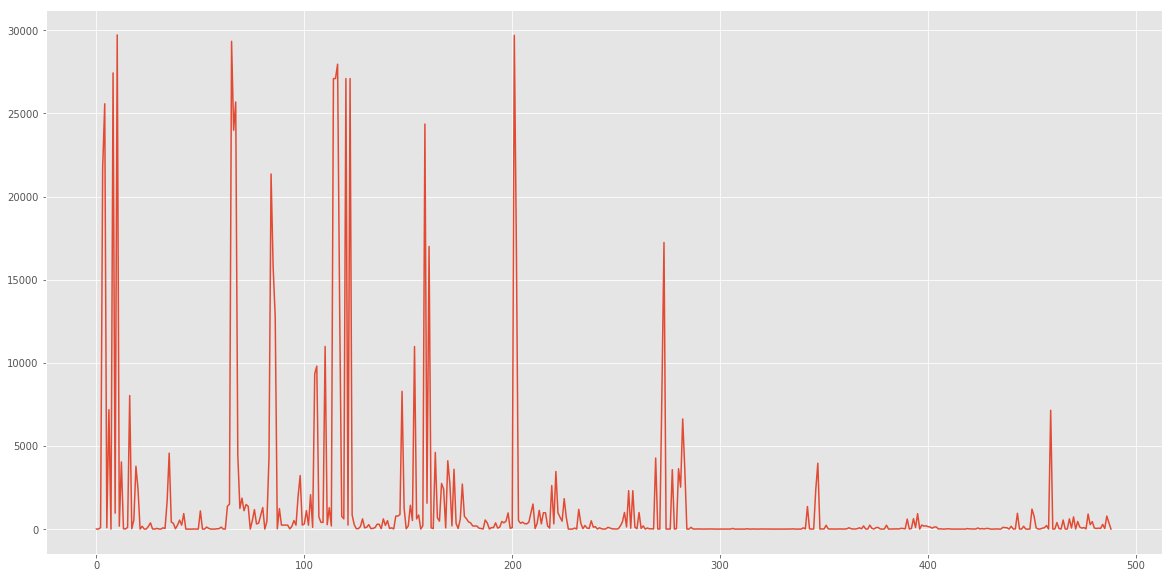

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df['Genome'])

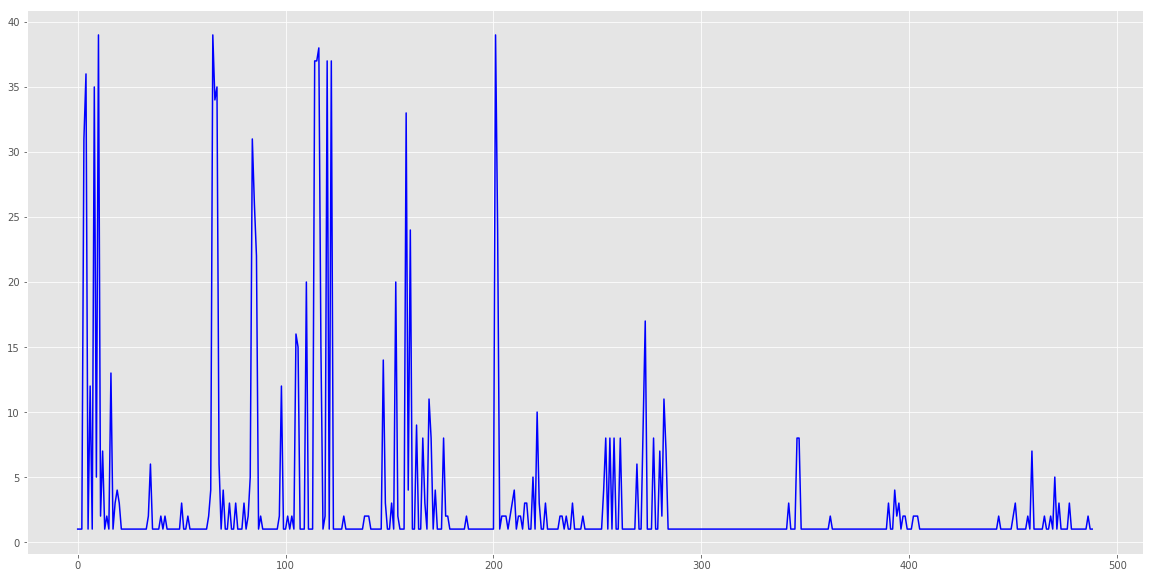

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df['Cluster'], color='blue',  label='Cluster')

<BarContainer object of 6 artists>

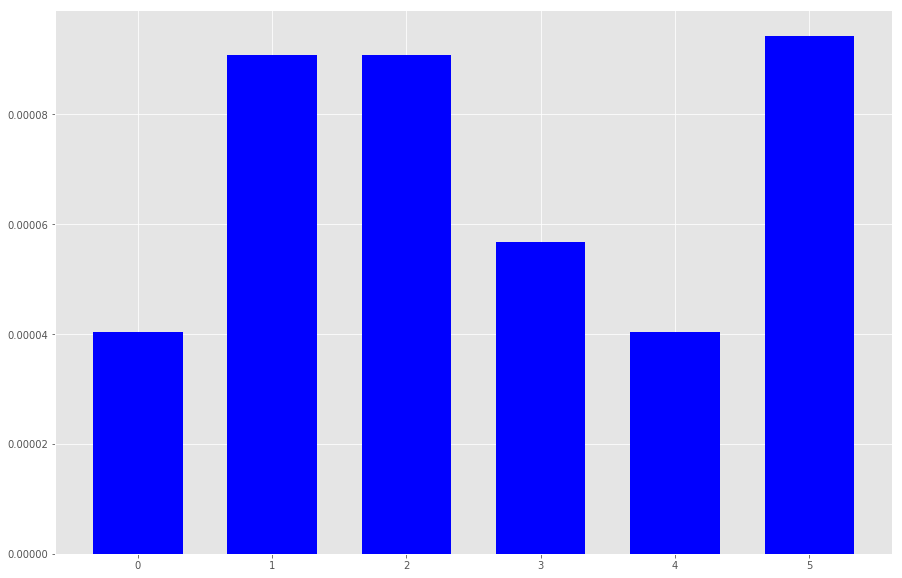

In [16]:
plt.figure(figsize=(15,10))
width = 1/1.5
y = enrichment[enrichment['p-value']<=1e-04]['p-value']
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")
# plt.plot(enrichment['p-value'])